In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import kurtosis, skew
import warnings

def extract_stat_features(img):
    img_gray = img.convert('L')
    data = np.asarray(img_gray).astype(np.float32).flatten()
    data = np.clip(data, 1e-5, 255)
    eps = 1e-5

    try:
        std = np.std(data)
        range_val = np.max(data) - np.min(data)
        median = np.median(data)
        geo_median = np.exp(np.mean(np.log(data + eps)))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            skewness = skew(data)
            kurt_val = kurtosis(data)

        d1 = np.diff(data)
        d2 = np.diff(d1)

        var0 = np.var(data) + eps
        var1 = np.var(d1) + eps
        var2 = np.var(d2) + eps

        mobility = np.sqrt(var1 / var0)
        raw_complexity = (var2 / var1) - (var1 / var0)
        raw_complexity = np.maximum(raw_complexity, 0)
        complexity = np.sqrt(raw_complexity)

        feats = np.array([std, range_val, median, geo_median, skewness, kurt_val, mobility, complexity], dtype=np.float32)
        feats = np.nan_to_num(feats, nan=0.0, posinf=0.0, neginf=0.0)

        return feats
    except:
        return np.zeros(8)

clean_dir = 'stegoimagesdataset/test/test/clean'
stego_dir = 'stegoimagesdataset/test/test/stego'

clean_map = {os.path.splitext(f)[0]: os.path.join(clean_dir, f) for f in os.listdir(clean_dir)}
stego_map = {}
for f in os.listdir(stego_dir):
    if f.endswith('.png'):
        key = f.split('_')[1]  # image_00001_eth_0.png -> '00001'
        stego_map.setdefault(key, []).append(os.path.join(stego_dir, f))

feature_names = ['std', 'range', 'median', 'geo_median', 'skewness', 'kurtosis', 'mobility', 'complexity']
nb_to_plot = 5

count = 0
for key in sorted(stego_map.keys()):
    if key not in clean_map:
        continue

    clean_path = clean_map[key]
    stego_paths = stego_map[key][:3]

    try:
        clean_img = Image.open(clean_path)
        clean_feats = extract_stat_features(clean_img)

        for steg_path in stego_paths:
            steg_img = Image.open(steg_path)
            steg_feats = extract_stat_features(steg_img)

            #x = np.arange(len(feature_names))
            #width = 0.35

            #plt.figure(figsize=(10, 4))
            #plt.bar(x - width/2, clean_feats, width, label='Clean', color='green')
            #plt.bar(x + width/2, steg_feats, width, label='Stego', color='red')
            #plt.xticks(x, feature_names, rotation=30)
            #plt.title(f"Comparison: clean vs {os.path.basename(steg_path)}")
            #plt.legend()
            #plt.tight_layout()
            #plt.show()
            print(f"clean {clean_path} vs {steg_path}")
            print(f"  Clean features: {clean_feats}")
            print(f"  Stego features: {steg_feats}")
            print(f"  Difference: {steg_feats - clean_feats}")

            count += 1
            if count >= nb_to_plot:
                break

    except Exception as e:
        print(f"Erreur avec {clean_path}: {e}")

    if count >= nb_to_plot:
        break


clean stegoimagesdataset/test/test/clean\04001.png vs stegoimagesdataset/test/test/stego\image_04001_eth_0.png
  Clean features: [ 1.11496925e+02  2.54999985e+02  2.45000000e+02  1.61622918e+00
 -7.74227500e-01 -1.33501935e+00  1.38167471e-01  1.40357482e+00]
  Stego features: [ 1.11496635e+02  2.54999985e+02  2.45000000e+02  1.61956811e+00
 -7.74227023e-01 -1.33501995e+00  1.38167903e-01  1.40357506e+00]
  Difference: [-2.8991699e-04  0.0000000e+00  0.0000000e+00  3.3389330e-03
  4.7683716e-07 -5.9604645e-07  4.3213367e-07  2.3841858e-07]
clean stegoimagesdataset/test/test/clean\04001.png vs stegoimagesdataset/test/test/stego\image_04001_html_0.png
  Clean features: [ 1.11496925e+02  2.54999985e+02  2.45000000e+02  1.61622918e+00
 -7.74227500e-01 -1.33501935e+00  1.38167471e-01  1.40357482e+00]
  Stego features: [ 1.1138718e+02  2.5499998e+02  2.4500000e+02  3.1766181e+00
 -7.7416039e-01 -1.3350471e+00  1.3822985e-01  1.4035033e+00]
  Difference: [-1.0974884e-01  0.0000000e+00  0.0000

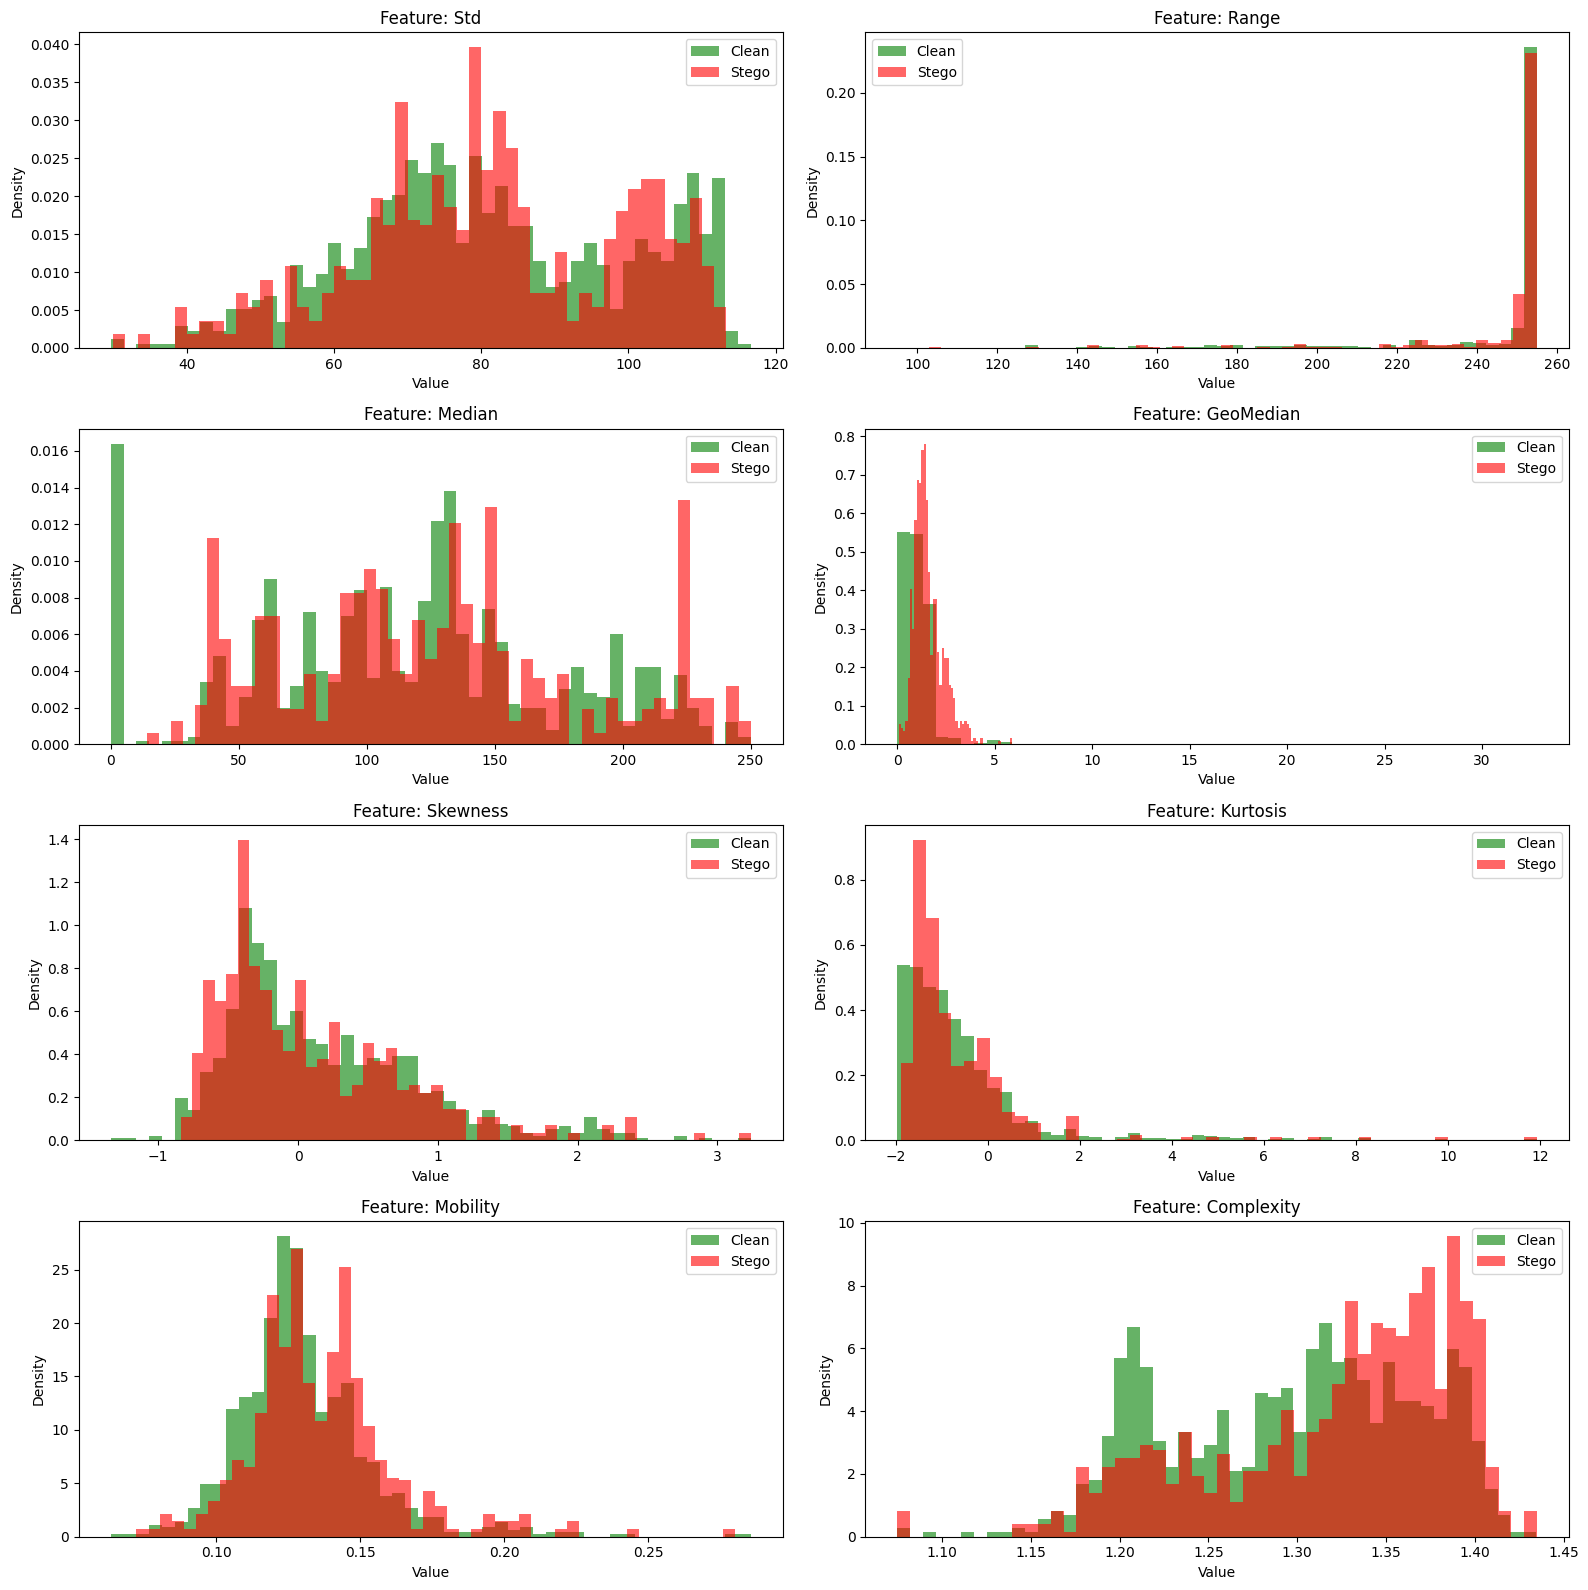

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import kurtosis, skew
import warnings

clean_dir = 'stegoimagesdataset/test/test/clean'
stego_dir = 'stegoimagesdataset/test/test/stego'

def extract_stat_features(img):
    img_gray = img.convert('L')
    data = np.asarray(img_gray).astype(np.float32).flatten()
    data = np.clip(data, 1e-5, 255)
    eps = 1e-5

    try:
        std = np.std(data)
        range_val = np.max(data) - np.min(data)
        median = np.median(data)
        geo_median = np.exp(np.mean(np.log(data + eps)))
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            skewness = skew(data)
            kurt = kurtosis(data)

        d1 = np.diff(data)
        d2 = np.diff(d1)

        var0 = np.var(data) + eps
        var1 = np.var(d1) + eps
        var2 = np.var(d2) + eps

        mobility = np.sqrt(var1 / var0)
        raw_complexity = (var2 / var1) - (var1 / var0)
        raw_complexity = np.maximum(raw_complexity, 0)
        complexity = np.sqrt(raw_complexity)

        return [std, range_val, median, geo_median, skewness, kurt, mobility, complexity]

    except Exception as e:
        print("Erreur feature:", e)
        return [0] * 8

clean_feats = []
stego_feats = []

max_samples = 1000

for img_name in os.listdir(clean_dir)[:max_samples]:
    path = os.path.join(clean_dir, img_name)
    try:
        img = Image.open(path)
        feats = extract_stat_features(img)
        clean_feats.append(feats)
    except:
        continue

for img_name in os.listdir(stego_dir)[:max_samples]:
    path = os.path.join(stego_dir, img_name)
    try:
        img = Image.open(path)
        feats = extract_stat_features(img)
        stego_feats.append(feats)
    except:
        continue

clean_feats = np.array(clean_feats)
stego_feats = np.array(stego_feats)

feature_names = ['Std', 'Range', 'Median', 'GeoMedian', 'Skewness', 'Kurtosis', 'Mobility', 'Complexity']

plt.figure(figsize=(16, 16))
for i in range(8):
    plt.subplot(4, 2, i+1)
    plt.hist(clean_feats[:, i], bins=50, alpha=0.6, label='Clean', color='green', density=True)
    plt.hist(stego_feats[:, i], bins=50, alpha=0.6, label='Stego', color='red', density=True)
    plt.title(f'Feature: {feature_names[i]}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


### Amplify LSB Effect

- Goal: Amplify LSB effect by applying Laplacian on the image
- Check if there are changes in the distributions of the features